# This Notebook Provides an Exploratory Data Analysis approach to Sentiment140 dataset


## Libraries

In [1]:
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

## Loading the data

In [2]:
# Load the data
DATASET_COLUMNS = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('C:/Users/IDEH/Desktop/Sentimental/Data/Sentiment140.csv',
                      encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
dataset.head(10)

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


# EDA

In [3]:
dataset.sample(10)

,sentiment,ids,date,flag,user,text
1170066,4,1980331122,Sun May 31 06:25:41 PDT 2009,NO_QUERY,pohui,Robbie said &quot;a niggling in morning&quot; ...
120057,0,1832772211,Sun May 17 21:27:58 PDT 2009,NO_QUERY,JessicaGottlieb,@thesmartmama I have no office. I know this i...
1044405,4,1957435103,Fri May 29 00:29:42 PDT 2009,NO_QUERY,ve6erc,"@chrisb803 With your real name, probably! H..."
1417353,4,2057585233,Sat Jun 06 13:16:40 PDT 2009,NO_QUERY,AngNewell77,@joeymcintyre I'm tingly- but sadly a long way...
619028,0,2227763963,Thu Jun 18 13:36:14 PDT 2009,NO_QUERY,Rebansch,My shoulders HATE me. I haven't moved them for...
1212856,4,1989295928,Mon Jun 01 01:01:38 PDT 2009,NO_QUERY,pH2k,@Niquesqueak That's where i was thinking of lo...
1305293,4,2011055308,Tue Jun 02 18:24:22 PDT 2009,NO_QUERY,krispysmith,Twenty sixth! I am so doing that again
1241642,4,1994041291,Mon Jun 01 11:19:16 PDT 2009,NO_QUERY,JasmineBarton,@dougiemcfly please please PLEASE say hey to @...
726413,0,2262568460,Sat Jun 20 22:46:24 PDT 2009,NO_QUERY,lahiru,@dulanja might be a bug neda?
662776,0,2243765543,Fri Jun 19 13:52:19 PDT 2009,NO_QUERY,trakesht,sweating


In [4]:
dataset.shape

(1600000, 6)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   ids        1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
dataset.describe()

,sentiment,ids
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


### Checking for Missing Values


checking for any missing values in the dataset, which is crucial for understanding data quality

In [7]:
# Check for missing values
missing_values = dataset.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 sentiment    0
ids          0
date         0
flag         0
user         0
text         0
dtype: int64


### Distribution of Sentiments

Understanding the distribution of sentiment classes is important to know if the dataset is balanced

In [8]:
# Distribution of sentiments
sentiment_distribution = dataset['sentiment'].value_counts(normalize=True) * 100
print("Sentiment distribution (%):\n", sentiment_distribution)


Sentiment distribution (%):
 0    50.0
4    50.0
Name: sentiment, dtype: float64


visualization

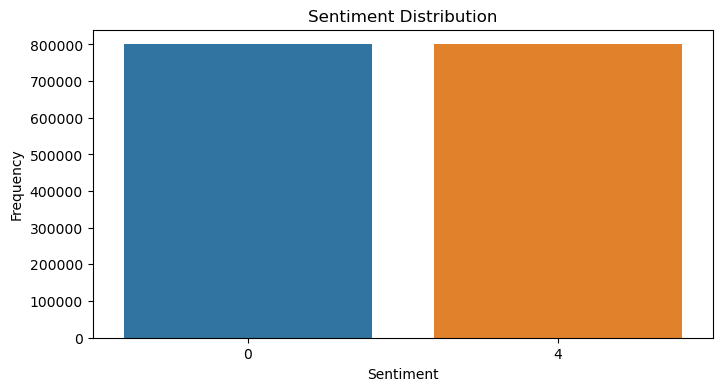

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting sentiment distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='sentiment', data=dataset)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


### Mapping the target Class Values

In [10]:
sentiment_map = {0: 0, 4: 1}  # 0: negative, 1: positive
dataset.loc[:, 'sentiment'] = dataset['sentiment'].map(sentiment_map)

### Text Preprocessing

Preprocessing is crucial in sentiment analysis. You can remove URLs, mentions, and special characters:

In [11]:
def preprocess(textdata):
    processedText = []
    wordLemm = WordNetLemmatizer()
    urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern = '@[^\s]+'
    alphaPattern = "[^a-zA-Z0-9]"
    sequencePattern = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"

    for tweet in textdata:
        tweet = tweet.lower()
        tweet = re.sub(urlPattern, '', tweet)
        tweet = re.sub(userPattern, '', tweet)  # Remove user mentions
        tweet = re.sub(alphaPattern, " ", tweet)
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        tweetwords = ''
        for word in tweet.split():
            word = wordLemm.lemmatize(word)
            tweetwords += (word + ' ')
        processedText.append(tweetwords.strip())

    return processedText


In [12]:
# Apply the updated preprocessing method
dataset['custom_cleaned_text'] = preprocess(dataset['text'].values)
# Display the first few rows of the DataFrame
dataset[['text', 'custom_cleaned_text']].head()

,text,custom_cleaned_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",aww that s a bummer you shoulda got david carr...
1,is upset that he can't update his Facebook by ...,is upset that he can t update his facebook by ...
2,@Kenichan I dived many times for the ball. Man...,i dived many time for the ball managed to save...
3,my whole body feels itchy and like its on fire,my whole body feel itchy and like it on fire
4,"@nationwideclass no, it's not behaving at all....",no it s not behaving at all i m mad why am i h...


In [13]:
dataset.sample(10)

,sentiment,ids,date,flag,user,text,custom_cleaned_text
47413,0,1677628683,Sat May 02 03:07:07 PDT 2009,NO_QUERY,Sfiroxx,I'm back in the Nam...on this sunny day; shame...,i m back in the nam on this sunny day shame sa...
237352,0,1980185235,Sun May 31 05:58:42 PDT 2009,NO_QUERY,Arasphere,On my way to get lunch. I miss my brother,on my way to get lunch i miss my brother
928249,1,1759504115,Sun May 10 19:21:32 PDT 2009,NO_QUERY,nickieknight,is going to play on the river tomorrow,is going to play on the river tomorrow
715748,0,2259507392,Sat Jun 20 17:41:52 PDT 2009,NO_QUERY,KaTe8425,@shelbeRoo I was just thinking that Shelby! I...,i wa just thinking that shelby i used 8 today ...
924092,1,1754879943,Sun May 10 07:39:07 PDT 2009,NO_QUERY,xCar0x,@Franzii93 dont be that negative.. i love lazy...,dont be that negative i love lazy sunday
480526,0,2179261505,Mon Jun 15 08:51:55 PDT 2009,NO_QUERY,kiiwy,worst day ever! just found out my grandpa died...,worst day ever just found out my grandpa died ...
833567,1,1557783912,Sun Apr 19 05:59:21 PDT 2009,NO_QUERY,marcosdesouza,futebolzinho ontem do #videolog showdi!!!,futebolzinho ontem do videolog showdi
1365248,1,2049930373,Fri Jun 05 17:45:22 PDT 2009,NO_QUERY,LibbiAnn,@KDX125 most def....I'm on the couch gettin re...,most def i m on the couch gettin ready to quot...
1066771,1,1965371969,Fri May 29 15:48:14 PDT 2009,NO_QUERY,scottfotki,best wii game for a three year old????.... help,best wii game for a three year old help
807246,1,1468955548,Tue Apr 07 04:34:34 PDT 2009,NO_QUERY,mrd2,@lizzyval I added pgatour. Do I get some PROV...,i added pgatour do i get some prov s for it


### Word Cloud

Creating word clouds for different sentiment categories can give insights into commonly used words

In [14]:
# Generate word clouds for positive and negative sentiments
positive_text = ' '.join(dataset[dataset['sentiment'] == 1]['custom_cleaned_text'])
negative_text = ' '.join(dataset[dataset['sentiment'] == 0]['custom_cleaned_text'])



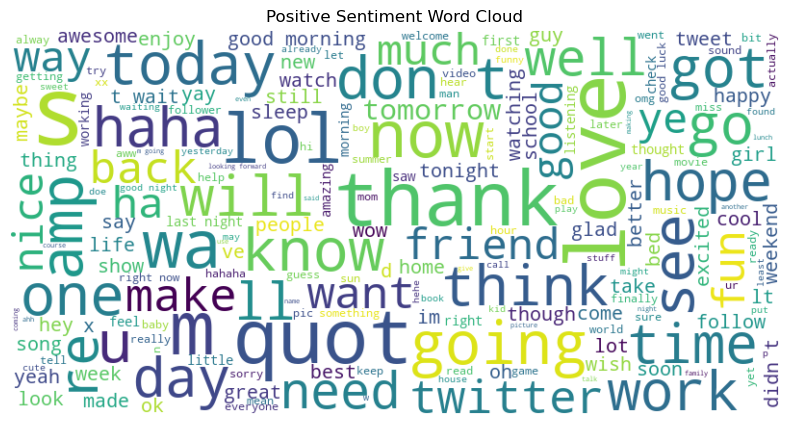

In [15]:
# Positive sentiment word cloud
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')
plt.show()



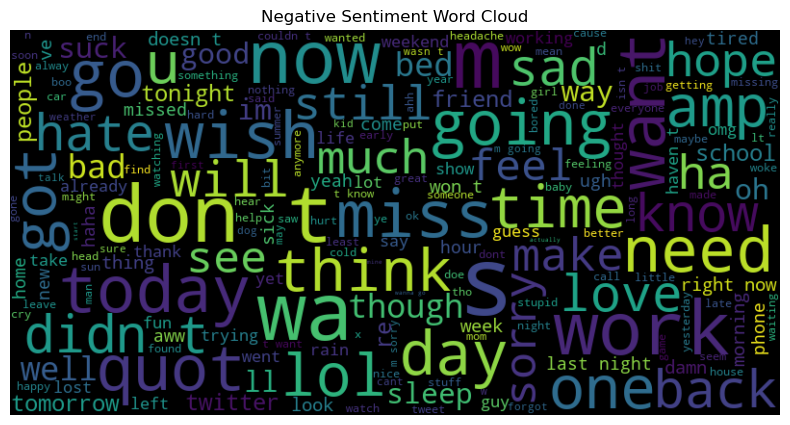

In [16]:
# Negative sentiment word cloud
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color='black').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')
plt.show()

### Statistical Summary

Examining the length of text data and other statistical measures 

Text length statistics:
 count    1.600000e+06
mean     6.200037e+01
std      3.417035e+01
min      0.000000e+00
25%      3.400000e+01
50%      5.700000e+01
75%      8.900000e+01
max      1.920000e+02
Name: text_length, dtype: float64


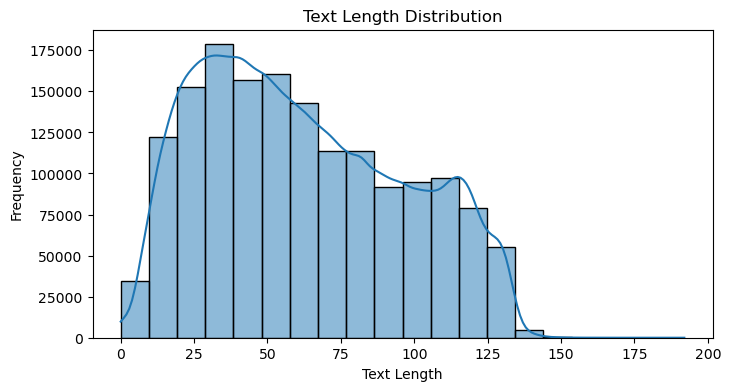

In [17]:
# Calculate text length
dataset['text_length'] = dataset['custom_cleaned_text'].apply(len)

# Statistical summary
print("Text length statistics:\n", dataset['text_length'].describe())

# Plotting text length distribution
plt.figure(figsize=(8, 4))
sns.histplot(dataset['text_length'], bins=20, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


### Sentiment Over Time

In [18]:
# # Convert date column to datetime
# dataset['date'] = pd.to_datetime(dataset['date'])

# # Group by date and sentiment
# sentiment_over_time = dataset.groupby([dataset['date'].dt.date, 'sentiment']).size().unstack().fillna(0)

# # Plotting
# sentiment_over_time.plot(kind='line', figsize=(12, 6))
# plt.title('Sentiment Over Time')
# plt.xlabel('Date')
# plt.ylabel('Frequency')
# plt.show()


### Top Users by Sentiment

In [19]:
# Top users with positive sentiment
top_positive_users = dataset[dataset['sentiment'] == 1]['user'].value_counts().head(10)

# Top users with negative sentiment
top_negative_users = dataset[dataset['sentiment'] == 0]['user'].value_counts().head(10)

print("Top Positive Users:\n\n", top_positive_users,"\n")
print("Top Negative Users:\n\n", top_negative_users)


Top Positive Users:

 what_bugs_u       246
DarkPiano         231
VioletsCRUK       218
tsarnick          212
keza34            211
shanajaca         204
TraceyHewins      193
ramdomthoughts    190
thisgoeshere      178
KevinEdwardsJr    171
Name: user, dtype: int64 

Top Negative Users:

 lost_dog           549
tweetpet           310
webwoke            264
mcraddictal        210
wowlew             210
SallytheShizzle    183
_magic8ball        136
Dogbook            133
mrs_mcsupergirl    123
nuttychris         121
Name: user, dtype: int64


### Hashtag Analysis

Analyze the most common hashtags used in positive and negative tweets

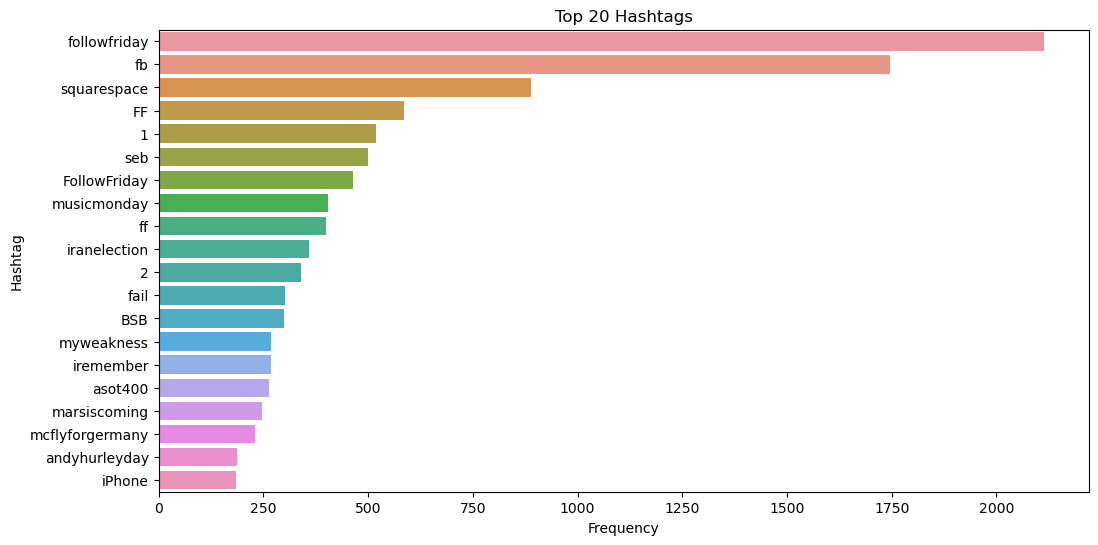

In [20]:
# Extract hashtags
dataset['hashtags'] = dataset['text'].apply(lambda x: re.findall(r"#(\w+)", x))

# Flatten the list of hashtags
all_hashtags = [hashtag for hashtags in dataset['hashtags'] for hashtag in hashtags]

# Count hashtags
hashtag_counts = pd.Series(all_hashtags).value_counts().head(20)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=hashtag_counts.values, y=hashtag_counts.index)
plt.title('Top 20 Hashtags')
plt.xlabel('Frequency')
plt.ylabel('Hashtag')
plt.show()


### N-gram Analysis

Perform an n-gram analysis to find common phrases in positive and negative tweets

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to generate n-grams with stop words removal
def generate_ngrams(text, n=2, max_features=10000):
    vectorizer = CountVectorizer(ngram_range=(n, n), max_features=max_features, stop_words='english')
    ngrams = vectorizer.fit_transform(text)
    ngrams_freq = ngrams.sum(axis=0).tolist()[0]
    ngrams_freq = [(word, ngrams_freq[idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngrams_freq = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)
    return ngrams_freq

# Generate bigrams for positive and negative sentiments with stop words removal
positive_bigrams = generate_ngrams(dataset[dataset['sentiment'] == 1]['custom_cleaned_text'], n=2, max_features=10000)
negative_bigrams = generate_ngrams(dataset[dataset['sentiment'] == 0]['custom_cleaned_text'], n=2, max_features=10000)

print("Top Positive Bigrams:\n\n", positive_bigrams[:20])
print("Top Negative Bigrams:\n\n", negative_bigrams[:20])


Top Positive Bigrams:

 [('good morning', 8553), ('just got', 5832), ('good luck', 3953), ('good night', 3891), ('looking forward', 3442), ('happy birthday', 3177), ('good day', 3022), ('great day', 2884), ('getting ready', 2830), ('mother day', 2785), ('let know', 2739), ('look like', 2667), ('sound like', 2552), ('good time', 2213), ('quot quot', 2194), ('happy mother', 2073), ('don know', 2053), ('wa good', 1991), ('feel like', 1905), ('going bed', 1866)]
Top Negative Bigrams:

 [('feel like', 6572), ('just got', 5550), ('wish wa', 4840), ('don know', 4683), ('look like', 4425), ('don want', 3756), ('don think', 2540), ('sorry hear', 2467), ('feel better', 2319), ('looking forward', 2200), ('getting ready', 2199), ('don like', 2072), ('ve got', 2016), ('good morning', 1999), ('going bed', 1888), ('really want', 1876), ('just woke', 1809), ('work today', 1800), ('don wanna', 1788), ('gonna miss', 1733)]


In [22]:
# Filter out common bigrams
positive_bigrams_set = set([bigram for bigram, freq in positive_bigrams])
negative_bigrams_set = set([bigram for bigram, freq in negative_bigrams])
unique_positive_bigrams = positive_bigrams_set - negative_bigrams_set
unique_negative_bigrams = negative_bigrams_set - positive_bigrams_set

print("Unique Positive Bigrams:\n", unique_positive_bigrams)
print("Unique Negative Bigrams:\n", unique_negative_bigrams)


Unique Positive Bigrams:
 {'hour good', 'did haha', 'like book', 'nice morning', 'birthday mom', 'thank lord', 'great seeing', 'followfriday thanks', 'soon think', 'fun thanks', 'twit twit', 'ice tea', 'watching hangover', 'hi miley', 'little le', 'tweet thanks', 'quot end', 'awesome ve', 'currently watching', 'day mama', 'fellow twitter', 'new new', 'gotta run', 'ur welcome', 'hey tweet', 'boy love', 'today best', 'sleep sweet', 'bridal shower', 'sure thanks', 'thanks follower', 'random people', 'sunny hot', 'start quot', 'online shopping', 'watch star', 'uploading picture', 'peace love', 'hey sweetie', 'night away', 'nice place', 'im proud', 'mean lot', 'got 10', 'wait xx', 'really quot', 'wolfram alpha', 'word just', 'yeah lot', 'luck xx', 'dm email', 'enjoy rest', 'morning wait', 'check latest', 'life make', 'ppl follow', 'zac efron', 'love shirt', 'thanks sending', 'tired happy', 'haha ill', 'welcome friend', 'live live', 'conan brien', 'll def', 'free quot', '21st birthday', 'tha

In [23]:
# Generate trigrams for positive and negative sentiments
positive_trigrams = generate_ngrams(dataset[dataset['sentiment'] == 1]['custom_cleaned_text'], n=3, max_features=100)
negative_trigrams = generate_ngrams(dataset[dataset['sentiment'] == 0]['custom_cleaned_text'], n=3, max_features=100)

print("Top Positive Trigrams:\n", positive_trigrams[:10])
print("Top Negative Trigrams:\n", negative_trigrams[:10])


Top Positive Trigrams:
 [('happy mother day', 2036), ('100 follower day', 1487), ('follower day using', 1484), ('day using add', 1484), ('using add train', 1484), ('add train pay', 1484), ('train pay vip', 1484), ('just got home', 1328), ('mtv movie award', 1063), ('new moon trailer', 524)]
Top Negative Trigrams:
 [('just got home', 1110), ('hope feel better', 878), ('lost help good', 550), ('help good home', 550), ('getting ready work', 540), ('don feel good', 517), ('feel better soon', 513), ('happy father day', 479), ('wish wa going', 405), ('feel like crap', 402)]


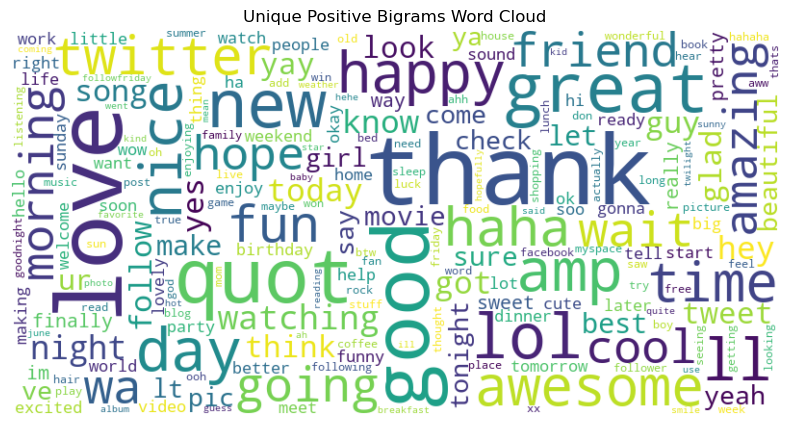

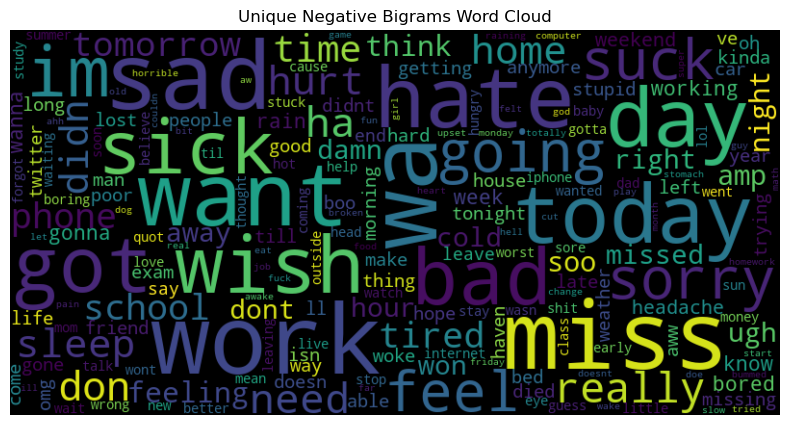

In [24]:
# Generate word clouds for unique positive and negative bigrams
positive_bigram_text = ' '.join([' '.join(bigram.split()) for bigram in unique_positive_bigrams])
negative_bigram_text = ' '.join([' '.join(bigram.split()) for bigram in unique_negative_bigrams])

# Positive bigram word cloud
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(positive_bigram_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Unique Positive Bigrams Word Cloud')
plt.show()

# Negative bigram word cloud
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color='black').generate(negative_bigram_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Unique Negative Bigrams Word Cloud')
plt.show()
